In [1]:
# %qtconsole

In [2]:
# imports
import pickle as pkl
from joblib import load
from sklearn.model_selection import train_test_split
#
from moduleModelTraining import TrainingMethods
from moduleMetrics import MetricsMethods

In [3]:
# class instances
train = TrainingMethods()
evaluate = MetricsMethods()

In [4]:
# Retrieve dataframes from EDA_PreProcessing
pathFileName_std = 'dataframes/df_std.joblib'
with open(pathFileName_std, 'rb') as f:
    df = load(f)
    print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
test_size = 0.25
cross_val_num=3

In [6]:
# split dataframe samples for the training and evaluation process
selected_features_3= ['smartphone_usage', 'age', 'exercising',  'nameingImp', 'family_med_history', 
                      'education', 'anaklisiImp', 'memoryImp', 'total_gr_in_gs']

# select x,y parts of dataframe
x = df[selected_features_3]
y = df.iloc[:, df.columns.get_loc('target_class')]

# Save x, y
pkl.dump(x, open('fragments/x.joblib', 'wb'))
pkl.dump(y, open('fragments/y.joblib', 'wb'))

# Split x, y to train, test fragments
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=7, test_size=test_size, stratify=y)

# Save fragments
x_train_path = 'fragments/x_train.joblib'
y_train_path = 'fragments/y_train.joblib'
pkl.dump(x_train, open(x_train_path, 'wb'))
pkl.dump(y_train, open(y_train_path, 'wb'))

print('x:',x.shape,' y:',y.shape)
print('x_train:',x_train.shape,' y_train:',y_train.shape)
print('x_test:',x_test.shape,' y_test:',y_train.shape)
print("Count of target class label NC: {}".format(sum(y_train==2)))
print("Count of target class label AD-MCI: {} \n".format(sum(y_train==1)))

x: (119, 9)  y: (119,)
x_train: (89, 9)  y_train: (89,)
x_test: (30, 9)  y_test: (89,)
Count of target class label NC: 19
Count of target class label AD-MCI: 70 



In [7]:
# train models before oversampling
trained_models = train.train_models(x_train, y_train, x_test, y_test)

Trained model:  lr  accuracy:  96.67
Trained model:  dt  accuracy:  96.67
Trained model:  rf  accuracy:  90.0
Trained model:  sv  accuracy:  80.0
Trained model:  gn  accuracy:  100.0
Trained model:  mp  accuracy:  96.67
Trained model:  kn  accuracy:  80.0
Trained model:  ce  accuracy:  100.0
Total training time: 0.83 seconds


Count of label NC in y_test: 6
Count of label AD-MCI in y_test: 24 



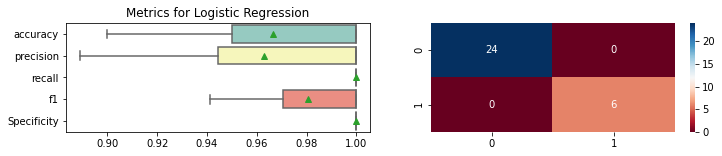

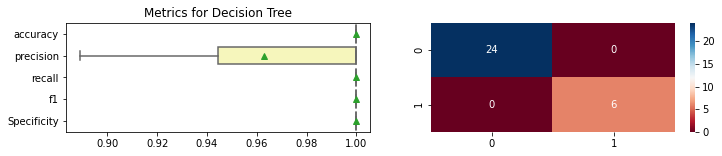

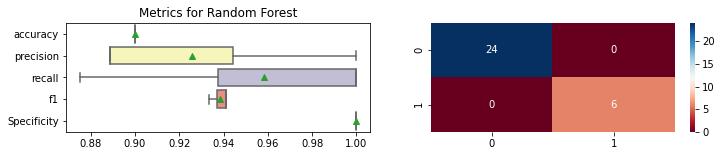

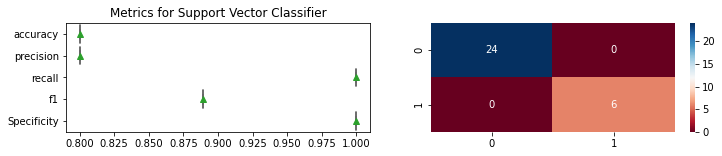

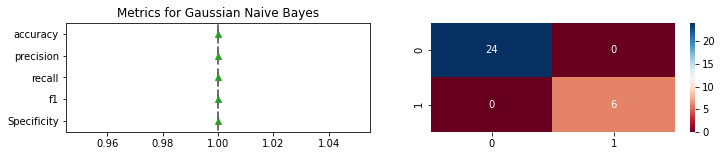

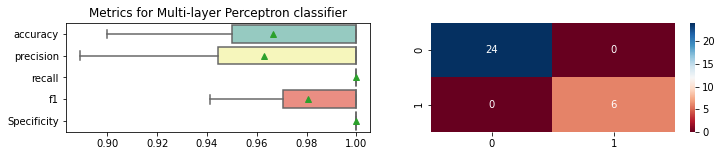

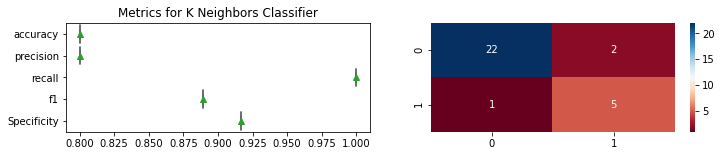

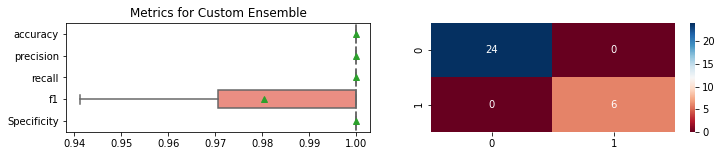

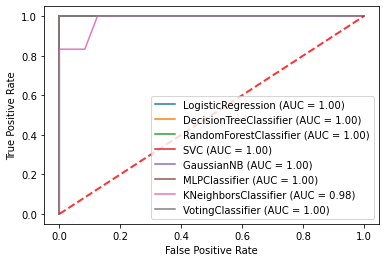

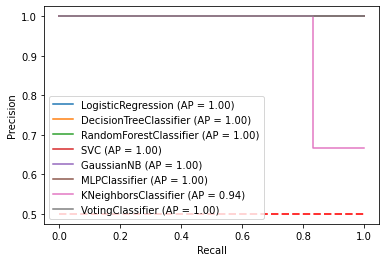

In [8]:
# evaluate models before oversampling
# evaluate.generate_metrics(trained_models, x_test, y_test, ['accuracy', 'precision', 'recall', 'f1', 'scorer_specificity'], cv_num=cross_val_num, show_raw_data=False)
evaluate.generate_metrics(trained_models, x_test, y_test, ['accuracy', 'precision', 'recall', 'f1'], cv_num=cross_val_num, show_raw_data=False)